In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('Partially Cleaned Salary Dataset.csv')

In [8]:
data.head()

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4339 non-null   int64  
 1   Company Name       4339 non-null   object 
 2   Job Title          4339 non-null   object 
 3   Salaries Reported  4339 non-null   int64  
 4   Location           4339 non-null   object 
 5   Salary             4339 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.5+ KB


In [12]:
print(data.isnull().sum())

Unnamed: 0           0
Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64


In [14]:
data = data.dropna()

In [16]:
label_encoder = LabelEncoder()
data['Company Name'] = label_encoder.fit_transform(data['Company Name'])
data['Job Title'] = label_encoder.fit_transform(data['Job Title'])
data['Location'] = label_encoder.fit_transform(data['Location'])

In [18]:
X = data[['Company Name', 'Job Title', 'Salaries Reported', 'Location']]
y = data['Salary']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
dt_regressor = DecisionTreeRegressor(random_state=42)

In [24]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
y_pred = dt_regressor.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 18373936454049.78
Mean Absolute Error: 910870.22
R-squared: -0.09


In [32]:
cv_scores = cross_val_score(dt_regressor, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean Cross-validation R-squared: {cv_scores.mean():.2f}')

Cross-validation R-squared scores: [ -1.83983211 -52.58222014  -0.38625205  -0.17874349  -0.71142009]
Mean Cross-validation R-squared: -11.14


In [34]:
from sklearn.tree import plot_tree

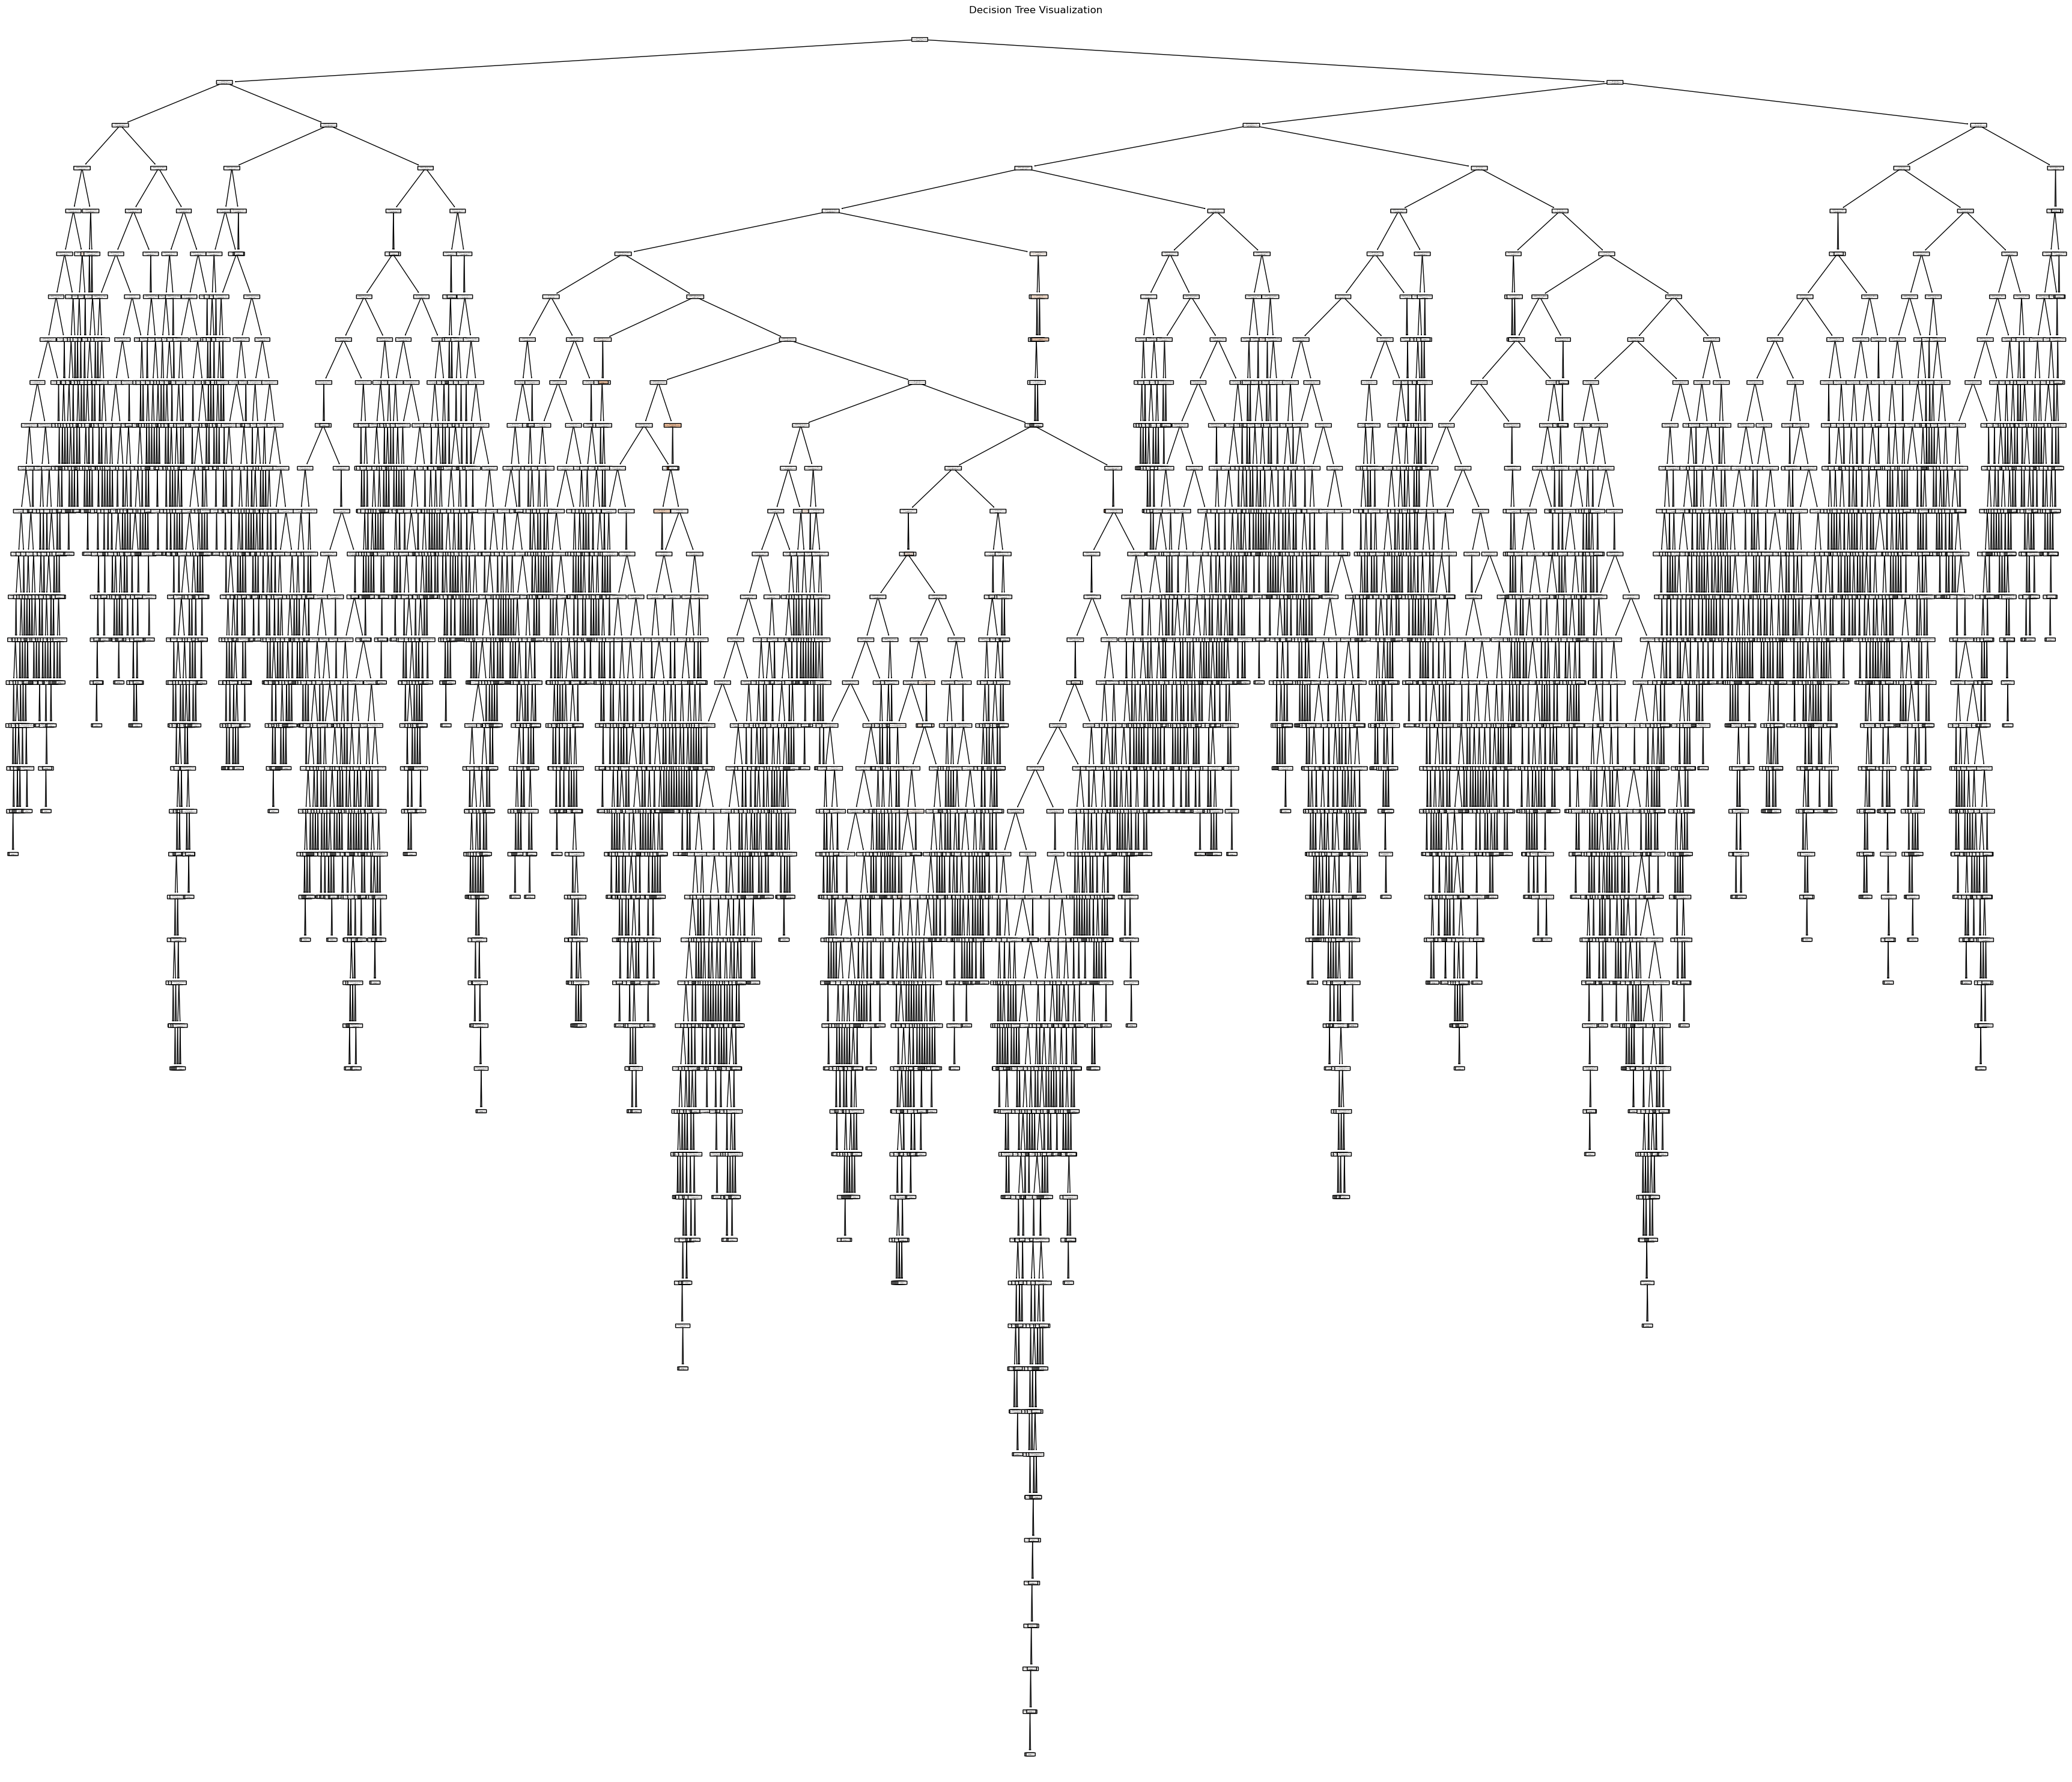

In [36]:
plt.figure(figsize=(44, 38))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()